<h1 style="color:red; text-align:center;">CodeX Beverage Price Prediction</h2>

In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

<h1 style="color:blue; text-align:center;">Data Cleaning</h2>

In [316]:
df = pd.read_csv("survey_results.csv")

In [317]:
df.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [318]:
df.duplicated().sum()

10

In [319]:
df.shape

(30010, 17)

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30010 entries, 0 to 30009
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   respondent_id                   30010 non-null  object
 1   age                             30010 non-null  int64 
 2   gender                          30010 non-null  object
 3   zone                            30010 non-null  object
 4   occupation                      30010 non-null  object
 5   income_levels                   21946 non-null  object
 6   consume_frequency(weekly)       30002 non-null  object
 7   current_brand                   30010 non-null  object
 8   preferable_consumption_size     30010 non-null  object
 9   awareness_of_other_brands       30010 non-null  object
 10  reasons_for_choosing_brands     30010 non-null  object
 11  flavor_preference               30010 non-null  object
 12  purchase_channel                30000 non-null

<h4 style="color:blue;">respondent_id should be unique so dropping duplicates based on it.</h2>

In [321]:
df = df.drop_duplicates(subset=["respondent_id"])

In [322]:
df.shape

(30000, 17)

In [323]:
df.describe()

,age
count,30000.000000
mean,33.048167
std,13.438904
min,18.000000
25%,23.000000
50%,31.000000
75%,40.000000
max,604.000000


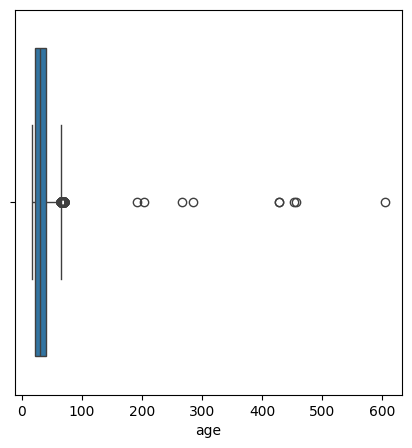

In [324]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="age", data = df)
plt.show()

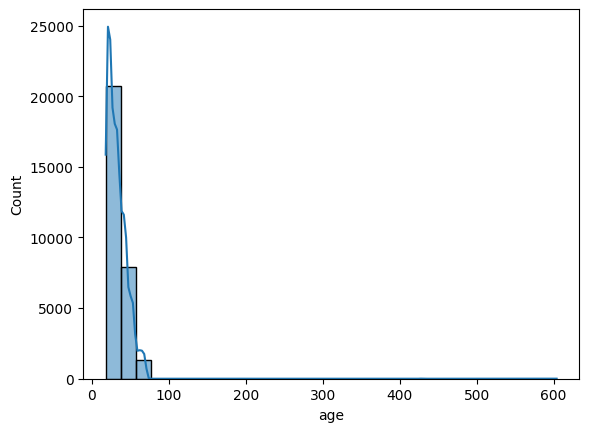

In [325]:
sns.histplot(df["age"], bins=30, kde=True)
plt.show()

In [326]:
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)

In [327]:
print(Q1, Q3)

23.0 40.0


In [328]:
IQR = Q3 - Q1

In [329]:
IQR

17.0

In [330]:
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [331]:
outliers = df[(df["age"] < lower) | (df["age"] > upper)]

In [332]:
outliers.shape

(493, 17)

In [333]:
outliers.describe()

,age
count,493.000000
mean,73.450304
std,44.003511
min,66.000000
25%,67.000000
50%,68.000000
75%,69.000000
max,604.000000


In [334]:
df = df[df["age"] <= 100]

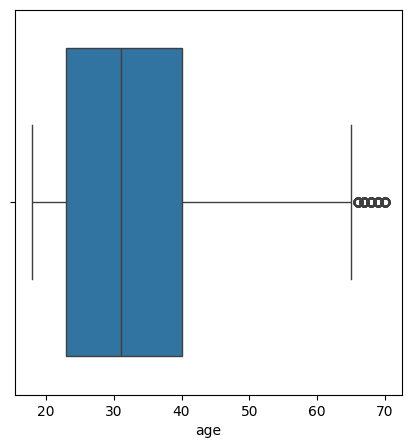

In [335]:
plt.figure(figsize=(5, 5))
sns.boxplot(x="age", data = df)
plt.show()

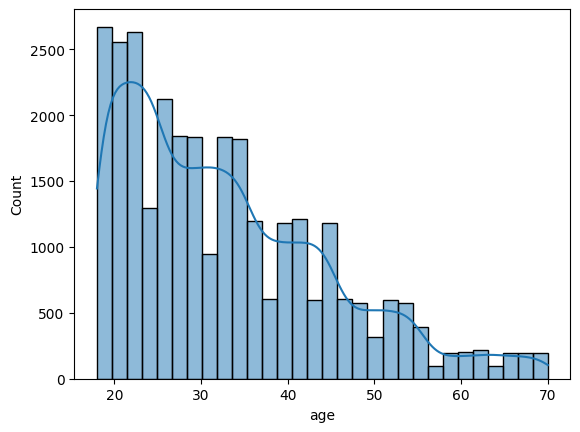

In [336]:
sns.histplot(df["age"], bins=30, kde=True)
plt.show()

<h4 style="color:blue;">Cleaned the age column by removing unrealistic values above 100 while keeping valid ages, ensuring the data is accurate and representative.</h2>

In [337]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29991 entries, 0 to 30009
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   respondent_id                   29991 non-null  object
 1   age                             29991 non-null  int64 
 2   gender                          29991 non-null  object
 3   zone                            29991 non-null  object
 4   occupation                      29991 non-null  object
 5   income_levels                   21931 non-null  object
 6   consume_frequency(weekly)       29983 non-null  object
 7   current_brand                   29991 non-null  object
 8   preferable_consumption_size     29991 non-null  object
 9   awareness_of_other_brands       29991 non-null  object
 10  reasons_for_choosing_brands     29991 non-null  object
 11  flavor_preference               29991 non-null  object
 12  purchase_channel                29981 non-null  obj

In [338]:
df.head()

,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200
4,R00005,23,M,Metro,Student,NaN,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100


In [339]:
df[df["income_levels"].isna()]["occupation"].unique()

array(['Student'], dtype=object)

In [340]:
df.loc[df["occupation"]=="Student", "income_levels"] = df.loc[df["occupation"]=="Student", "income_levels"].fillna("Not Reported")

In [341]:
df[df["income_levels"].isna()]["occupation"].unique()

array([], dtype=object)

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29991 entries, 0 to 30009
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   respondent_id                   29991 non-null  object
 1   age                             29991 non-null  int64 
 2   gender                          29991 non-null  object
 3   zone                            29991 non-null  object
 4   occupation                      29991 non-null  object
 5   income_levels                   29991 non-null  object
 6   consume_frequency(weekly)       29983 non-null  object
 7   current_brand                   29991 non-null  object
 8   preferable_consumption_size     29991 non-null  object
 9   awareness_of_other_brands       29991 non-null  object
 10  reasons_for_choosing_brands     29991 non-null  object
 11  flavor_preference               29991 non-null  object
 12  purchase_channel                29981 non-null  obj

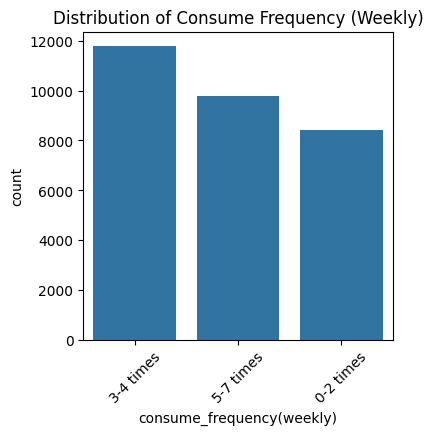

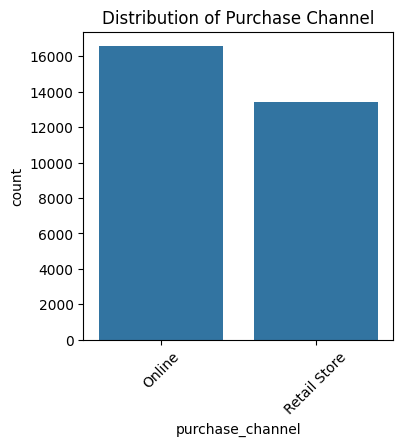

In [343]:
plt.figure(figsize=(4, 4))
sns.countplot(x="consume_frequency(weekly)", data=df)
plt.xticks(rotation=45)   
plt.title("Distribution of Consume Frequency (Weekly)")
plt.show()

plt.figure(figsize=(4, 4))
sns.countplot(x="purchase_channel", data=df)
plt.xticks(rotation=45)
plt.title("Distribution of Purchase Channel")
plt.show()


In [344]:
print(df["consume_frequency(weekly)"].isnull().sum()
,df["purchase_channel"].isnull().sum())

8 10


In [345]:
df["consume_frequency(weekly)"].mode()[0]

'3-4 times'

In [346]:
df["consume_frequency(weekly)"].fillna(df["consume_frequency(weekly)"].mode()[0], inplace=True)
df["purchase_channel"].fillna(df["purchase_channel"].mode()[0], inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11280\654606503.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["consume_frequency(weekly)"].fillna(df["consume_frequency(weekly)"].mode()[0], inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11280\654606503.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29991 entries, 0 to 30009
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   respondent_id                   29991 non-null  object
 1   age                             29991 non-null  int64 
 2   gender                          29991 non-null  object
 3   zone                            29991 non-null  object
 4   occupation                      29991 non-null  object
 5   income_levels                   29991 non-null  object
 6   consume_frequency(weekly)       29991 non-null  object
 7   current_brand                   29991 non-null  object
 8   preferable_consumption_size     29991 non-null  object
 9   awareness_of_other_brands       29991 non-null  object
 10  reasons_for_choosing_brands     29991 non-null  object
 11  flavor_preference               29991 non-null  object
 12  purchase_channel                29991 non-null  obj

<h4 style="color:blue;">Handled missing values in consume_frequency(weekly) and purchase_channel by filling them with their respective mode values (“3-4 times” and “Online”), since only a few records were missing..</h2>

In [348]:
df["zone"].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban', 'Metor', 'urbna'],
      dtype=object)

In [349]:
df[df["zone"]=="Metor"].shape[0]

4

In [350]:
df.loc[df["zone"] == "Metor", "zone"] = "Metro"
df.loc[df["zone"] == "urbna", "zone"] = "Urban"

In [351]:
df["zone"].unique()

array(['Urban', 'Metro', 'Rural', 'Semi-Urban'], dtype=object)

In [352]:
df["current_brand"].unique()

array(['Newcomer', 'Established', 'newcomer', 'Establishd'], dtype=object)

In [353]:
df.loc[df["current_brand"] == "newcomer", "current_brand"] = "Newcomer"
df.loc[df["current_brand"] == "Establishd", "current_brand"] = "Established"

In [354]:
df["current_brand"].unique()

array(['Newcomer', 'Established'], dtype=object)

<h4 style="color:blue;">Corrected spelling inconsistencies in the zone and current_brand columns to ensure uniform categories across the dataset.</h2>

<h1 style="color:blue; text-align:center;">Feature Engineering</h2>

<h4 style="color:blue;">Categorized Age into Age Groups</h2>

In [355]:
df['age_group'] = df['age'].apply(lambda x: '18-25' if 18 <= x <= 25 
                                  else '26-35' if 26 <= x <= 35 
                                  else '36-45' if 36 <= x <= 45 
                                  else '46-55' if 46 <= x <= 55 
                                  else '56-70' if 56 <= x <= 70 
                                  else '70+')
df.drop(columns=['age'], inplace=True)


<h4 style="color:blue;">Created `cf_ab_score` (Consume Frequency and Awareness Brand
Score)</h2>

In [356]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25


In [357]:
consume_frequency_map = {"0-2 times" : 1 , "3-4 times" : 2 , "5-7 times" : 3}
awareness_of_other_brands_map = {"0 to 1" : 1 , "2 to 4" : 2 , "above 4" : 3}

In [358]:
df["cf_ab_score"] = round(df["consume_frequency(weekly)"].map(consume_frequency_map,)/(df["consume_frequency(weekly)"].map(consume_frequency_map) + df["awareness_of_other_brands"].map(awareness_of_other_brands_map)),2) 

<h4 style="color:blue;">Created Zone Affluence Score (ZAS)</h2>

In [359]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67


In [360]:
zone_map = {"Urban" :3, "Metro" : 4,  "Rural" : 1,  "Semi-Urban" : 2}

In [361]:
income_levels_map = {"<10L" : 1, "10L - 15L" :2, "16L - 25L" : 3, "26L - 35L" : 4, "> 35L" : 5, "Not Reported" : 0}

In [362]:
df["zas_score"] = df["zone"].map(zone_map) * df["income_levels"].map(income_levels_map)

<h4 style="color:blue;">Brand Switching Indicator (BSI) column</h2>

In [363]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 29991 entries, 0 to 30009
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   respondent_id                   29991 non-null  object 
 1   gender                          29991 non-null  object 
 2   zone                            29991 non-null  object 
 3   occupation                      29991 non-null  object 
 4   income_levels                   29991 non-null  object 
 5   consume_frequency(weekly)       29991 non-null  object 
 6   current_brand                   29991 non-null  object 
 7   preferable_consumption_size     29991 non-null  object 
 8   awareness_of_other_brands       29991 non-null  object 
 9   reasons_for_choosing_brands     29991 non-null  object 
 10  flavor_preference               29991 non-null  object 
 11  purchase_channel                29991 non-null  object 
 12  packaging_preference            29991

In [365]:
df["bsi"] = (df["current_brand"].apply(lambda x: False if x == "Established"
                                      else True) & df["reasons_for_choosing_brands"].apply(lambda x: True if x=="Price"
                                      else True if x== "Quality"
                                     else False))

In [366]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,True
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,False
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,False
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,False
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,False


In [367]:
df["zas_score"].nunique()

14

In [368]:
pd.crosstab(df["age_group"], df["occupation"])

occupation,Entrepreneur,Retired,Student,Working Professional
age_group,,,,
18-25,535,0,7328,2605
26-35,1826,0,697,6570
36-45,1619,0,0,4353
46-55,799,0,0,2167
56-70,221,1130,35,106


In [369]:
pd.crosstab(df["occupation"], df["income_levels"])

income_levels,10L - 15L,16L - 25L,26L - 35L,<10L,> 35L,Not Reported
occupation,,,,,,
Entrepreneur,1246,1392,1076,710,576,0
Retired,221,119,0,790,0,0
Student,0,0,0,0,0,8060
Working Professional,3784,4386,2796,3161,1674,0


In [370]:
pd.crosstab(df["income_levels"], df["consume_frequency(weekly)"])

consume_frequency(weekly),0-2 times,3-4 times,5-7 times
income_levels,,,
10L - 15L,1475,2123,1653
16L - 25L,1668,2343,1886
26L - 35L,800,1437,1635
<10L,1474,1815,1372
> 35L,568,885,797
Not Reported,2438,3191,2431


In [371]:
pd.crosstab(df["income_levels"], df["purchase_channel"])

purchase_channel,Online,Retail Store
income_levels,,
10L - 15L,2694,2557
16L - 25L,2949,2948
26L - 35L,2359,1513
<10L,2398,2263
> 35L,1265,985
Not Reported,4907,3153


<h4 style="color:blue;">Removed logical outliers</h2>

In [372]:
df = df.loc[~((df["age_group"] == "56-70") & (df["occupation"] == "Student"))]

In [373]:
df.head()

,respondent_id,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range,age_group,cf_ab_score,zas_score,bsi
0,R00001,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150,26-35,0.67,3,True
1,R00002,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250,46-55,0.60,20,False
2,R00003,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250,36-45,0.50,5,False
3,R00004,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200,26-35,0.75,9,False
4,R00005,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",50-100,18-25,0.67,0,False


In [374]:
df["cf_ab_score"].max()

0.75

In [375]:
df["zas_score"].nunique()

14

In [376]:
df.shape

(29956, 20)

In [377]:
df[df["bsi"]==0].shape

(20796, 20)

<h1 style="color:blue; text-align:center;">Predictive Modelling</h2>

In [378]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [379]:
from sklearn.preprocessing import LabelEncoder

<h4 style="color:blue;">Preparing Feature Matrix and Target Variable</h2>

In [380]:
y = df["price_range"]
X = df.drop(columns=["price_range", "respondent_id"])

In [381]:
X.head()

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
0,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",26-35,0.67,3,True
1,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),46-55,0.60,20,False
2,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",36-45,0.50,5,False
3,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",26-35,0.75,9,False
4,M,Metro,Student,Not Reported,3-4 times,Established,Medium (500 ml),0 to 1,Availability,Traditional,Online,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",18-25,0.67,0,False


In [382]:
y.head()

0    100-150
1    200-250
2    200-250
3    150-200
4     50-100
Name: price_range, dtype: object

<h4 style="color:blue;">Train Data and Test Data split </h2>

In [383]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42,
)

In [384]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22467 entries, 8391 to 23691
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          22467 non-null  object 
 1   zone                            22467 non-null  object 
 2   occupation                      22467 non-null  object 
 3   income_levels                   22467 non-null  object 
 4   consume_frequency(weekly)       22467 non-null  object 
 5   current_brand                   22467 non-null  object 
 6   preferable_consumption_size     22467 non-null  object 
 7   awareness_of_other_brands       22467 non-null  object 
 8   reasons_for_choosing_brands     22467 non-null  object 
 9   flavor_preference               22467 non-null  object 
 10  purchase_channel                22467 non-null  object 
 11  packaging_preference            22467 non-null  object 
 12  health_concerns                 22

In [385]:
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

In [386]:
numerical_cols = [col for col in X_train.columns if X_train[col].dtype != "object"]

In [387]:
for col in numerical_cols:
    print(col)

cf_ab_score
zas_score
bsi


In [388]:
for col in categorical_cols:
    print(col," : ",X_train[col].unique())

gender  :  ['F' 'M']
zone  :  ['Semi-Urban' 'Urban' 'Metro' 'Rural']
occupation  :  ['Working Professional' 'Student' 'Entrepreneur' 'Retired']
income_levels  :  ['10L - 15L' '16L - 25L' 'Not Reported' '<10L' '> 35L' '26L - 35L']
consume_frequency(weekly)  :  ['0-2 times' '5-7 times' '3-4 times']
current_brand  :  ['Newcomer' 'Established']
preferable_consumption_size  :  ['Small (250 ml)' 'Medium (500 ml)' 'Large (1 L)']
awareness_of_other_brands  :  ['above 4' '2 to 4' '0 to 1']
reasons_for_choosing_brands  :  ['Availability' 'Quality' 'Price' 'Brand Reputation']
flavor_preference  :  ['Traditional' 'Exotic']
purchase_channel  :  ['Online' 'Retail Store']
packaging_preference  :  ['Simple' 'Premium' 'Eco-Friendly']
health_concerns  :  ['Low (Not very concerned)' 'Medium (Moderately health-conscious)'
 'High (Very health-conscious)']
typical_consumption_situations  :  ['Social (eg. Parties)' 'Active (eg. Sports, gym)' 'Casual (eg. At home)']
age_group  :  ['18-25' '26-35' '36-45' '56-

<h4 style="color:blue;">Label encoding to relevant columns</h2>

In [389]:
ordinal_cols = ["age_group", "income_levels", "health_concerns", 
                "consume_frequency(weekly)", "preferable_consumption_size"]

In [390]:
le_dict = {}

In [391]:
for col in ordinal_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    le_dict[col] = le

In [392]:
X_train.head()

,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,age_group,cf_ab_score,zas_score,bsi
8391,F,Semi-Urban,Working Professional,0,0,Newcomer,2,above 4,Availability,Traditional,Online,Simple,1,Social (eg. Parties),0,0.25,4,False
26395,F,Urban,Working Professional,1,2,Established,1,2 to 4,Quality,Traditional,Online,Premium,2,Social (eg. Parties),0,0.60,9,False
11276,F,Urban,Student,5,1,Newcomer,2,2 to 4,Price,Traditional,Online,Simple,2,"Active (eg. Sports, gym)",0,0.50,0,True
9110,M,Metro,Working Professional,1,1,Established,0,2 to 4,Quality,Traditional,Online,Premium,1,"Active (eg. Sports, gym)",1,0.50,12,False
3373,M,Metro,Entrepreneur,1,0,Established,0,above 4,Brand Reputation,Traditional,Online,Eco-Friendly,2,Casual (eg. At home),1,0.25,12,False


In [393]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22467 entries, 8391 to 23691
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          22467 non-null  object 
 1   zone                            22467 non-null  object 
 2   occupation                      22467 non-null  object 
 3   income_levels                   22467 non-null  int32  
 4   consume_frequency(weekly)       22467 non-null  int32  
 5   current_brand                   22467 non-null  object 
 6   preferable_consumption_size     22467 non-null  int32  
 7   awareness_of_other_brands       22467 non-null  object 
 8   reasons_for_choosing_brands     22467 non-null  object 
 9   flavor_preference               22467 non-null  object 
 10  purchase_channel                22467 non-null  object 
 11  packaging_preference            22467 non-null  object 
 12  health_concerns                 22

<h4 style="color:blue;">One hot encoding to relevant columns</h2>

In [394]:
X_train = pd.get_dummies(X_train,  drop_first=True)
X_test  = pd.get_dummies(X_test,  drop_first=True)

In [395]:
y_train.head()

8391      50-100
26395    200-250
11276    100-150
9110     150-200
3373     150-200
Name: price_range, dtype: object

In [396]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
le_dict["price_range"] = le

In [397]:
y_train[:5]

array([3, 2, 0, 1, 1])

<h4 style="color:blue;">Gaussian Naive Bayes Model, Accuracy: 0.58</h2>

In [398]:
model_gnb = GaussianNB()

Accuracy: 0.5636266524235546


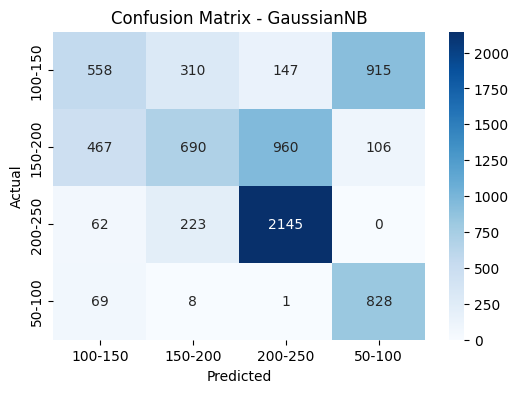

In [399]:
model_gnb.fit(X_train, y_train)
y_predict = model_gnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - GaussianNB")
plt.show()

In [400]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.48      0.29      0.36      1930
           1       0.56      0.31      0.40      2223
           2       0.66      0.88      0.75      2430
           3       0.45      0.91      0.60       906

    accuracy                           0.56      7489
   macro avg       0.54      0.60      0.53      7489
weighted avg       0.56      0.56      0.53      7489



<h4 style="color:blue;">Logistic Regression Model, Accuracy: 0.80</h2>

In [401]:
model_lr = LogisticRegression()

Accuracy: 0.7985044732274001


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


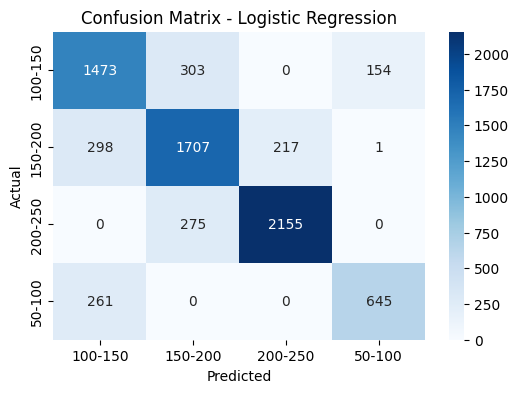

In [402]:
model_lr.fit(X_train, y_train)
y_predict = model_lr.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [403]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1930
           1       0.75      0.77      0.76      2223
           2       0.91      0.89      0.90      2430
           3       0.81      0.71      0.76       906

    accuracy                           0.80      7489
   macro avg       0.80      0.78      0.79      7489
weighted avg       0.80      0.80      0.80      7489



<h4 style="color:blue;">Support Vector Classifier, Accuracy: 0.82</h2>

In [404]:
model_svc = SVC()

Accuracy: 0.823607958338897


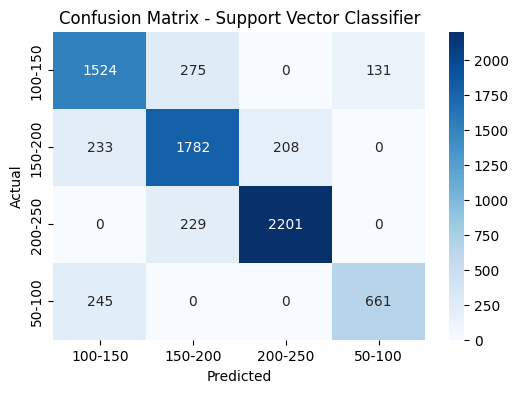

In [405]:
model_svc.fit(X_train, y_train)
y_predict = model_svc.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Support Vector Classifier")
plt.show()

In [406]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1930
           1       0.78      0.80      0.79      2223
           2       0.91      0.91      0.91      2430
           3       0.83      0.73      0.78       906

    accuracy                           0.82      7489
   macro avg       0.82      0.81      0.81      7489
weighted avg       0.82      0.82      0.82      7489



<h4 style="color:blue;">Random Forest Classifier, Accuracy: 0.89</h2>

In [407]:
model_rf = RandomForestClassifier()

Accuracy: 0.8955801842702631


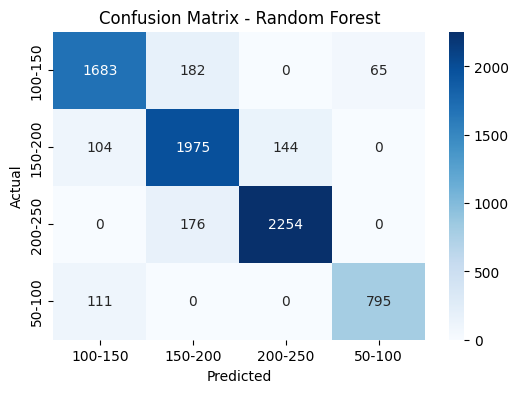

In [408]:
model_rf.fit(X_train, y_train)
y_predict = model_rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [409]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      1930
           1       0.85      0.89      0.87      2223
           2       0.94      0.93      0.93      2430
           3       0.92      0.88      0.90       906

    accuracy                           0.90      7489
   macro avg       0.90      0.89      0.90      7489
weighted avg       0.90      0.90      0.90      7489



<h4 style="color:blue;">XGB Classifier, Accuracy: 0.92</h2>

In [410]:
model_xgb = XGBClassifier()

Accuracy: 0.9225530778475097


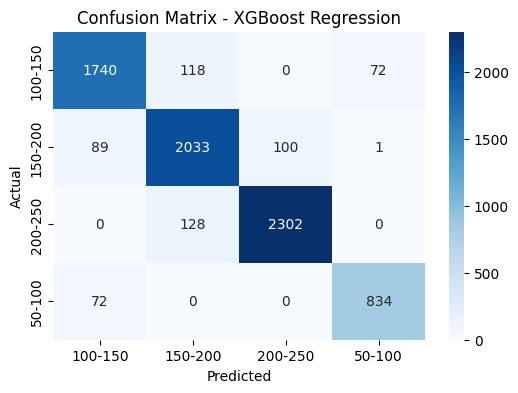

In [411]:
model_xgb.fit(X_train, y_train)
y_predict = model_xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost Regression")
plt.show()

In [412]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1930
           1       0.89      0.91      0.90      2223
           2       0.96      0.95      0.95      2430
           3       0.92      0.92      0.92       906

    accuracy                           0.92      7489
   macro avg       0.92      0.92      0.92      7489
weighted avg       0.92      0.92      0.92      7489



In [413]:
from joblib import dump

artifacts = {
    "label_encoders": le_dict,
    "final_columns": list(X_train.columns),
    "model": model_xgb
}

dump(artifacts, "artifacts/final_bundle.joblib")
print("✅ Model + encoders + schema saved successfully!")

✅ Model + encoders + schema saved successfully!


<h4 style="color:blue;">LGBM Classifier, Accuracy: 0.92</h2>

In [414]:
model_lbgm = LGBMClassifier()

In [415]:
def clean_colnames(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(r"[()]", "", regex=True)
        .str.replace(r"[^0-9a-zA-Z]+", "_", regex=True)
        .str.replace(r"__+", "_", regex=True)
        .str.strip("_")
    )
    return df


X_train = clean_colnames(X_train)
X_test = clean_colnames(X_test)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 82
[LightGBM] [Info] Number of data points in the train set: 22467, number of used features: 27
[LightGBM] [Info] Start training from score -1.343386
[LightGBM] [Info] Start training from score -1.228925
[LightGBM] [Info] Start training from score -1.126779
[LightGBM] [Info] Start training from score -2.100810
Accuracy: 0.9214848444385099


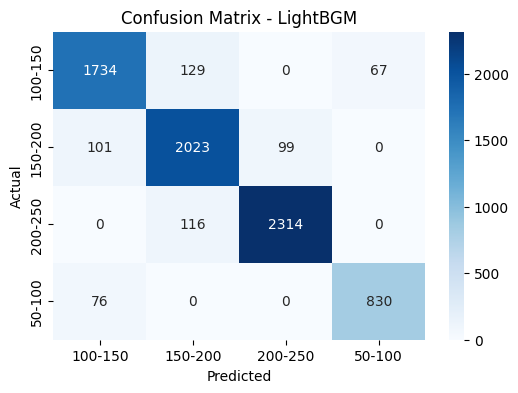

In [416]:
model_lbgm.fit(X_train, y_train, feature_name="auto")
y_predict = model_lbgm.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - LightBGM")
plt.show()

In [417]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1930
           1       0.89      0.91      0.90      2223
           2       0.96      0.95      0.96      2430
           3       0.93      0.92      0.92       906

    accuracy                           0.92      7489
   macro avg       0.92      0.92      0.92      7489
weighted avg       0.92      0.92      0.92      7489



In [418]:
artifacts["final_columns"]

['income_levels',
 'consume_frequency(weekly)',
 'preferable_consumption_size',
 'health_concerns',
 'age_group',
 'cf_ab_score',
 'zas_score',
 'bsi',
 'gender_M',
 'zone_Rural',
 'zone_Semi-Urban',
 'zone_Urban',
 'occupation_Retired',
 'occupation_Student',
 'occupation_Working Professional',
 'current_brand_Newcomer',
 'awareness_of_other_brands_2 to 4',
 'awareness_of_other_brands_above 4',
 'reasons_for_choosing_brands_Brand Reputation',
 'reasons_for_choosing_brands_Price',
 'reasons_for_choosing_brands_Quality',
 'flavor_preference_Traditional',
 'purchase_channel_Retail Store',
 'packaging_preference_Premium',
 'packaging_preference_Simple',
 'typical_consumption_situations_Casual (eg. At home)',
 'typical_consumption_situations_Social (eg. Parties)']

<h1 style="color:blue; text-align:center;">MLFlow Deployment</h2>

In [ ]:
import dagshub
dagshub.init(repo_owner='joshi.somesh1996', repo_name='dagshub_beverage_price_experiment_tracking', mlflow=True)

import mlflow
from sklearn.metrics import classification_report
import joblib
import os
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# ✅ Correct MLflow credentials
os.environ['MLFLOW_TRACKING_USERNAME'] = 'joshi.somesh1996'
os.environ['MLFLOW_TRACKING_PASSWORD'] = '48d6b3969b848942bfa2b07564d1046b2f994288'
os.environ['MLFLOW_TRACKING_URI'] = 'https://dagshub.com/joshi.somesh1996/dagshub_beverage_price_experiment_tracking.mlflow'

mlflow.set_tracking_uri(os.environ['MLFLOW_TRACKING_URI'])

# ✅ Set experiment
mlflow.set_experiment("Beverage Price Prediction")

models = {
    "GaussianNB": GaussianNB(),
    "LogisticRegression": LogisticRegression(),
    "SVC": SVC(),
    "RandomForest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier()
}

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):
        # Train model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Metrics
        report = classification_report(y_test, y_pred, output_dict=True)

        # Log parameters
        mlflow.log_param("model_name", model_name)
        for param, value in model.get_params().items():
            mlflow.log_param(param, value)

        # Log metrics
        mlflow.log_metric("accuracy", report["accuracy"])
        mlflow.log_metric("recall_class_1", report["1"]["recall"])
        mlflow.log_metric("recall_class_0", report["0"]["recall"])
        mlflow.log_metric("f1_score_macro", report["macro avg"]["f1-score"])

        # Log model artifact
        model_file = f"{model_name}.pkl"
        joblib.dump(model, model_file)
        mlflow.log_artifact(model_file, artifact_path="model")
        os.remove(model_file)


Initialized MLflow to track repo "joshi.somesh1996/mlflow_dagshub_beverage_price_prediction"

Repository joshi.somesh1996/mlflow_dagshub_beverage_price_prediction initialized!

🏃 View run GaussianNB at: https://dagshub.com/joshi.somesh1996/mlflow_dagshub_beverage_price_prediction.mlflow/#/experiments/1/runs/27b2ffb310ec4535acdb52e18036cd81
🧪 View experiment at: https://dagshub.com/joshi.somesh1996/mlflow_dagshub_beverage_price_prediction.mlflow/#/experiments/1


C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🏃 View run LogisticRegression at: https://dagshub.com/joshi.somesh1996/mlflow_dagshub_beverage_price_prediction.mlflow/#/experiments/1/runs/2d840864d944405e8b01f3473071c122
🧪 View experiment at: https://dagshub.com/joshi.somesh1996/mlflow_dagshub_beverage_price_prediction.mlflow/#/experiments/1
🏃 View run SVC at: https://dagshub.com/joshi.somesh1996/mlflow_dagshub_beverage_price_prediction.mlflow/#/experiments/1/runs/610fdbd8a641465db44001aa0fe326ed
🧪 View experiment at: https://dagshub.com/joshi.somesh1996/mlflow_dagshub_beverage_price_prediction.mlflow/#/experiments/1
🏃 View run RandomForest at: https://dagshub.com/joshi.somesh1996/mlflow_dagshub_beverage_price_prediction.mlflow/#/experiments/1/runs/1f254ea03bd140c1a7f7abd29025442c
🧪 View experiment at: https://dagshub.com/joshi.somesh1996/mlflow_dagshub_beverage_price_prediction.mlflow/#/experiments/1
🏃 View run XGBoost at: https://dagshub.com/joshi.somesh1996/mlflow_dagshub_beverage_price_prediction.mlflow/#/experiments/1/runs/f775